# Twitter Sentiment Analysis using KNN

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [32]:
data=pd.read_csv('train.csv')
data=data.dropna()

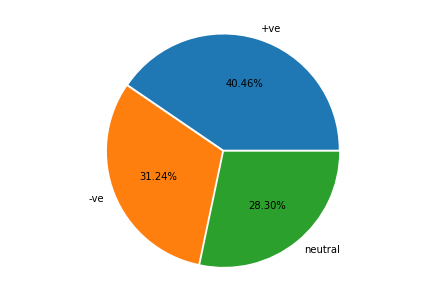

In [33]:
counts=data['sentiment'].value_counts()
counts
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
lab = ['+ve','-ve','neutral']
ax.pie(counts,labels=lab,autopct='%1.2f%%',explode=(0.01,0.01,0.01))
plt.show()

In [34]:
from nltk.tokenize import sent_tokenize
text=data.text[1]
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Playing Ghost Online is really interesting.', 'The new updates are Kirin pet and Metamorph for third job.', 'Can`t wait to have a dragon pet']


In [35]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Playing', 'Ghost', 'Online', 'is', 'really', 'interesting', '.', 'The', 'new', 'updates', 'are', 'Kirin', 'pet', 'and', 'Metamorph', 'for', 'third', 'job', '.', 'Can', '`', 't', 'wait', 'to', 'have', 'a', 'dragon', 'pet']


In [36]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 26 samples and 28 outcomes>


In [37]:
fdist.most_common()

[('.', 2),
 ('pet', 2),
 ('Playing', 1),
 ('Ghost', 1),
 ('Online', 1),
 ('is', 1),
 ('really', 1),
 ('interesting', 1),
 ('The', 1),
 ('new', 1),
 ('updates', 1),
 ('are', 1),
 ('Kirin', 1),
 ('and', 1),
 ('Metamorph', 1),
 ('for', 1),
 ('third', 1),
 ('job', 1),
 ('Can', 1),
 ('`', 1),
 ('t', 1),
 ('wait', 1),
 ('to', 1),
 ('have', 1),
 ('a', 1),
 ('dragon', 1)]

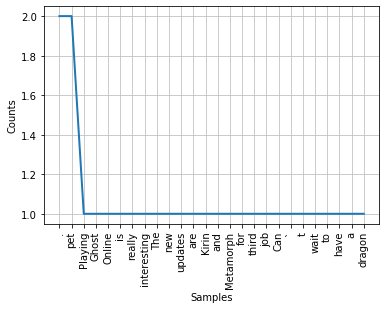

In [38]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

In [39]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'mustn', "wasn't", 'you', 'after', 'above', 'wouldn', 'didn', 'most', 'all', 'can', 'any', 'your', 'own', 'aren', 'be', 'yours', "mustn't", 'him', 'ma', 'no', 'these', 'herself', 'being', 'nor', 'again', 'the', 'haven', 'then', "don't", 'such', 'themselves', 'that', 'out', 'yourself', 'are', 'between', 'over', 'few', "wouldn't", 'had', 't', 'doesn', 'down', 'in', 'weren', 'below', 'whom', 'shouldn', 'against', 'am', 'did', 'they', 'is', 'll', 'its', 'needn', "weren't", 'should', "that'll", 'because', 'my', 'me', 'each', "didn't", 'mightn', "hasn't", 'who', 'by', "you're", "you'd", 'why', 'ours', 'so', 'couldn', 'this', 'has', 's', 'about', 'isn', 'while', "should've", 'do', 'hadn', 'have', 'y', 'he', 'm', 'here', 'd', "you'll", 'which', 'her', 'at', 'off', 'now', 'of', "shan't", 'will', 'wasn', 'a', "aren't", 'through', 'with', 'from', "it's", 'what', 'those', 'hers', 'not', 'o', 'doing', "needn't", 'as', 'or', 'won', 'were', 'once', 'where', 'himself', 'when', 'their', 'too', 'been',

In [40]:
tokenized_sent=tokenized_word

In [41]:
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Playing', 'Ghost', 'Online', 'is', 'really', 'interesting', '.', 'The', 'new', 'updates', 'are', 'Kirin', 'pet', 'and', 'Metamorph', 'for', 'third', 'job', '.', 'Can', '`', 't', 'wait', 'to', 'have', 'a', 'dragon', 'pet']
Filterd Sentence: ['Playing', 'Ghost', 'Online', 'really', 'interesting', '.', 'The', 'new', 'updates', 'Kirin', 'pet', 'Metamorph', 'third', 'job', '.', 'Can', '`', 'wait', 'dragon', 'pet']


# Stemming

In [42]:

from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Playing', 'Ghost', 'Online', 'really', 'interesting', '.', 'The', 'new', 'updates', 'Kirin', 'pet', 'Metamorph', 'third', 'job', '.', 'Can', '`', 'wait', 'dragon', 'pet']
Stemmed Sentence: ['play', 'ghost', 'onlin', 'realli', 'interest', '.', 'the', 'new', 'updat', 'kirin', 'pet', 'metamorph', 'third', 'job', '.', 'can', '`', 'wait', 'dragon', 'pet']


# Lexicon Normalization


# performing stemming and Lemmatization

In [43]:


from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [44]:
sent = data.text[1]
tokens=nltk.word_tokenize(sent)
print(tokens)

['Playing', 'Ghost', 'Online', 'is', 'really', 'interesting', '.', 'The', 'new', 'updates', 'are', 'Kirin', 'pet', 'and', 'Metamorph', 'for', 'third', 'job', '.', 'Can', '`', 't', 'wait', 'to', 'have', 'a', 'dragon', 'pet']


In [45]:
nltk.pos_tag(tokens)

[('Playing', 'VBG'),
 ('Ghost', 'NNP'),
 ('Online', 'NNP'),
 ('is', 'VBZ'),
 ('really', 'RB'),
 ('interesting', 'JJ'),
 ('.', '.'),
 ('The', 'DT'),
 ('new', 'JJ'),
 ('updates', 'NNS'),
 ('are', 'VBP'),
 ('Kirin', 'NNP'),
 ('pet', 'NN'),
 ('and', 'CC'),
 ('Metamorph', 'NNP'),
 ('for', 'IN'),
 ('third', 'JJ'),
 ('job', 'NN'),
 ('.', '.'),
 ('Can', 'MD'),
 ('`', '``'),
 ('t', 'VB'),
 ('wait', 'NN'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('a', 'DT'),
 ('dragon', 'NN'),
 ('pet', 'NN')]

# tokenizer to remove unwanted elements from out data like symbols and numbers

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer


token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['text'])

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['sentiment'], test_size=0.3, random_state=1)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7, metric='euclidean',algorithm='brute')
classifier.fit(X_train, y_train)


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [49]:
y_pred=classifier.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 535, 1769,   62],
       [ 186, 2961,  164],
       [  94, 1554,  910]], dtype=int64)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.66      0.23      0.34      2366
     neutral       0.47      0.89      0.62      3311
    positive       0.80      0.36      0.49      2558

    accuracy                           0.54      8235
   macro avg       0.64      0.49      0.48      8235
weighted avg       0.63      0.54      0.50      8235



In [52]:
import joblib
filename = 'finalized_model_knn.sav'
joblib.dump(classifier, filename)

['finalized_model_knn.sav']

In [53]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.5350333940497874
